In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
data = pd.read_csv('banking.csv')
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
data = data[numeric_cols]
data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [17]:
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [19]:
y_pred = log_reg.predict(X_test)

In [22]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10730,   251],
       [  827,   549]], dtype=int64)

<AxesSubplot: >

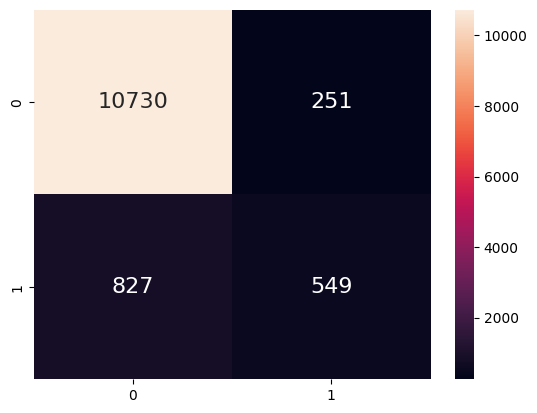

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 16}, fmt='g')

In [24]:
 print(metrics.accuracy_score(y_test, y_pred))

0.9127619972485231


In [28]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

Precision: 0.68625
Recall: 0.39898255813953487
F1: [0.95216967 0.50459559]


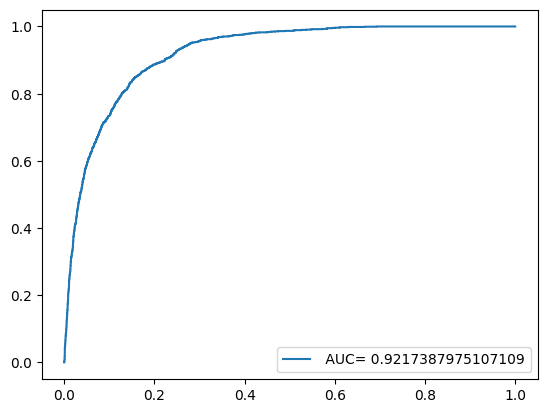

In [30]:
y_pred_proba = log_reg.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
print(f'AUC = {round(auc,2)}, відповідно, модель достатньо надійна для прийняття рішень')

AUC = 0.92, відповідно, модель достатньо надійна для прийняття рішень
